In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import lmfit
from tqdm.auto import tqdm

In [36]:
sns.set()
%matplotlib inline

In [37]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%autoreload 2

In [39]:
from sir_models.seir import SEIR
from sir_models.utils import stepwise

# Load data

In [40]:
df = pd.read_csv('data/data.csv', sep=';')

In [41]:
df.columns = ['date', 'region', 'total_infected', 'total_recovered', 'total_dead', 'deaths_per_day', 'infected_per_day', 'recovered_per_day']
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

df['infected'] = df['total_infected'] - df['total_recovered'] - df['total_dead']

In [42]:
df = df[df.region == 'Москва'].reset_index()
#df = df.groupby('date').sum().reset_index()

In [43]:
df.head()

,index,date,region,total_infected,total_recovered,total_dead,deaths_per_day,infected_per_day,recovered_per_day,infected
0,40,2020-03-12,Москва,21,0,0,0,21,0,21
1,122,2020-03-13,Москва,26,0,0,0,5,0,26
2,204,2020-03-14,Москва,35,0,0,0,9,0,35
3,286,2020-03-15,Москва,35,1,0,0,0,1,34
4,368,2020-03-16,Москва,53,1,0,0,18,0,52


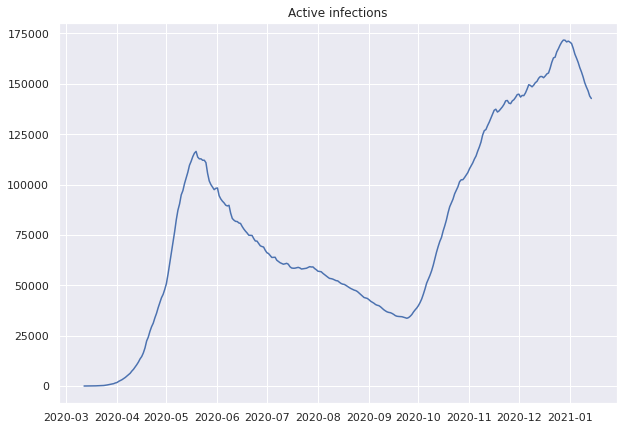

In [44]:
plt.figure(figsize=(10,7))
plt.plot(df.date, df.infected)
plt.title("Active infections")
plt.show()

# Model

In [45]:
train_subset = df[(df.date >= '2020-03-25') & (df.date <= '2020-11-30')]

In [46]:
test_subset = df[df.date > train_subset.iloc[-1].date]
test_subset.date[:3]

264   2020-12-01
265   2020-12-02
266   2020-12-03
Name: date, dtype: datetime64[ns]

In [47]:
model = SEIR()
model.fit(train_subset)

Getting initial conditions
Optimizing params
Mae: 204.45947595560068
Mae: 204.45947595560068
Mae: 204.45947595560068
Mae: 204.45913742963612
Mae: 204.45934363655
Mae: 204.4594324258969
Mae: 204.45946771689847
Mae: 204.45947568980822
Mae: 209.9819840628156
Mae: 204.37781945632946
Mae: 204.3777873306048
Mae: 204.37771628549584
Mae: 204.37782151981432
Mae: 204.37781860164134
Mae: 204.37781943759308
Mae: 192.6812343831597
Mae: 192.6812347592634
Mae: 192.68123053841967
Mae: 192.6812320760962
Mae: 192.68123245861716
Mae: 192.68123400160658
Mae: 193.26556641412716
Mae: 193.26556411179837
Mae: 193.26555220333677
Mae: 193.26551369450976
Mae: 193.26554959527778
Mae: 193.265565736673
Mae: 194.60121372926187
Mae: 189.9594473220028
Mae: 189.95944382720634
Mae: 189.95944278627172
Mae: 189.95947497977002
Mae: 189.95944225478982
Mae: 189.9594466095217
Mae: 194.24880720002398
Mae: 188.90101799550047
Mae: 188.90101223653593
Mae: 188.90104687556493
Mae: 188.9010157480648
Mae: 188.90101763766745
Mae: 188.

In [48]:
(S, E, I, R, D), history = model.predict_train()

result = model.fit_result_
result

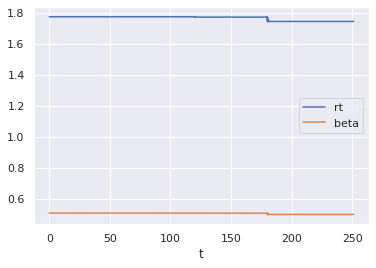

In [49]:
plt.figure()
history.rt.plot()
history.beta.plot()
plt.legend()
plt.show()

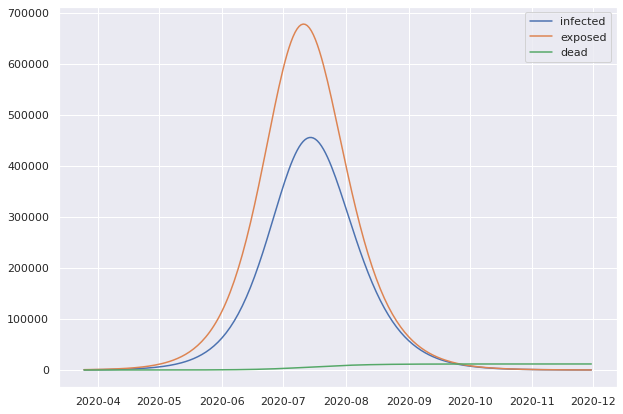

In [50]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, I, label='infected')
plt.plot(train_subset.date, E, label='exposed')
plt.plot(train_subset.date, D, label='dead')
plt.legend()
plt.show()

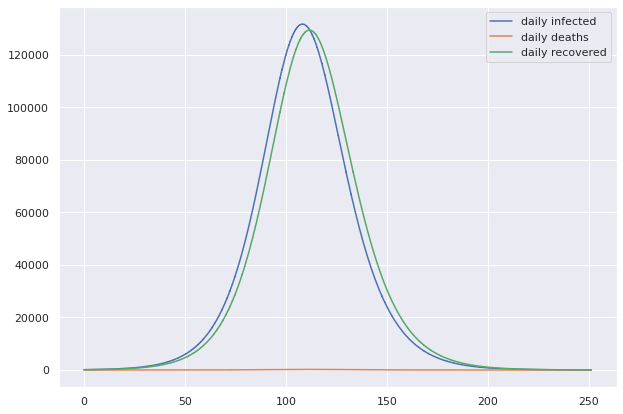

In [51]:
plt.figure(figsize=(10, 7))
plt.plot(history.new_infected, label='daily infected')
plt.plot(history.new_dead, label='daily deaths')
plt.plot(history.new_recovered, label='daily recovered')
plt.legend()
plt.show()

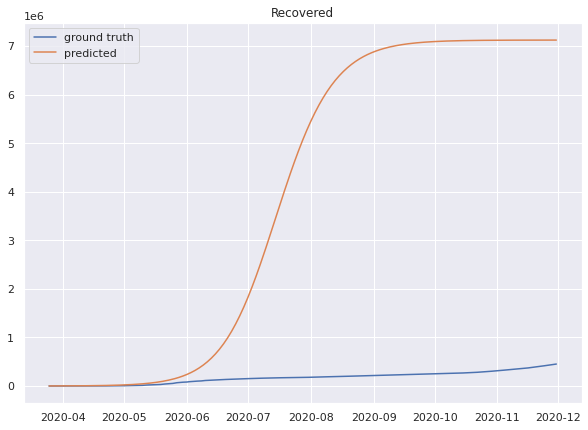

In [52]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['total_recovered'], label='ground truth')
plt.plot(train_subset.date, R, label='predicted')
plt.legend()
plt.title('Recovered')
plt.show()

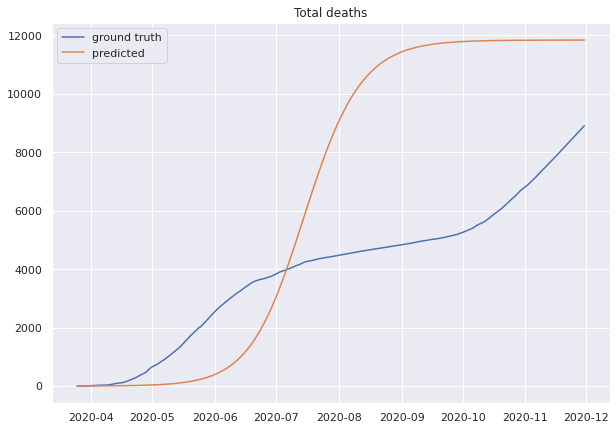

In [53]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['total_dead'], label='ground truth')
plt.plot(train_subset.date, D, label='predicted')
plt.legend()
plt.title('Total deaths')
plt.show()

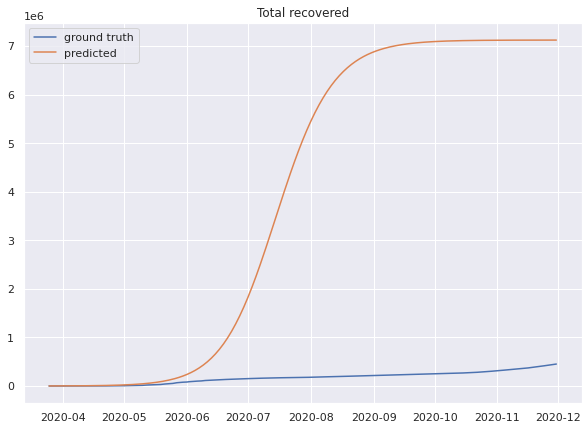

In [54]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['total_recovered'], label='ground truth')
plt.plot(train_subset.date, R, label='predicted')
plt.legend()
plt.title('Total recovered')
plt.show()

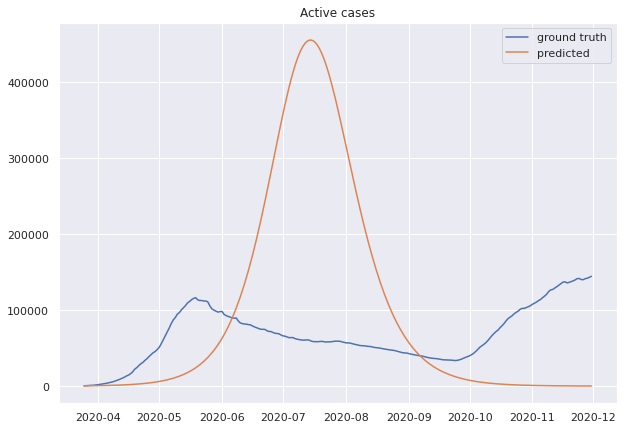

In [55]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['infected'], label='ground truth')
plt.plot(train_subset.date, I, label='predicted')
plt.legend()
plt.title('Active cases')
plt.show()

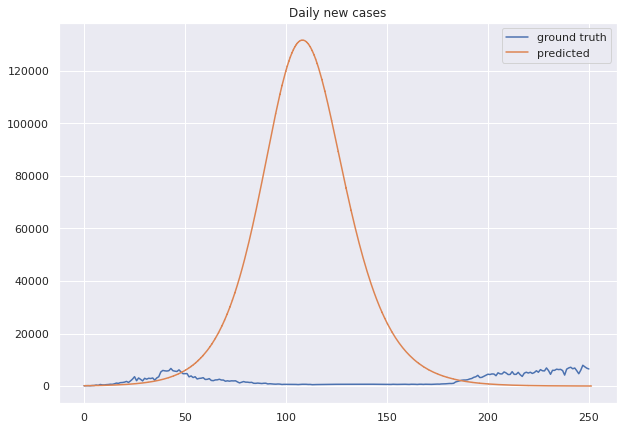

In [56]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(train_subset)), train_subset['infected_per_day'], label='ground truth')
plt.plot(history.new_infected, label='predicted')
plt.legend()
plt.title('Daily new cases')
plt.show()

# Obtain forecast

In [57]:
test_t = len(train_subset) + np.arange(len(test_subset))

(test_S, test_E, test_I, test_R, test_D), history = model.predict_test(test_t)

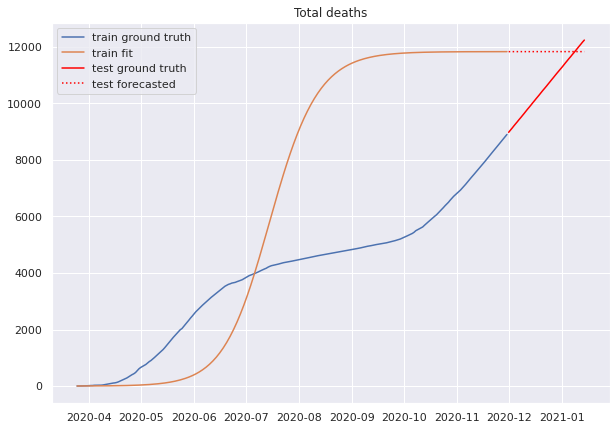

In [58]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['total_dead'], label='train ground truth')
plt.plot(train_subset.date, D, label='train fit')

plt.plot(test_subset.date, test_subset['total_dead'], label='test ground truth', color='red')
plt.plot(test_subset.date, test_D, label='test forecasted', color='red', linestyle=':')
plt.legend()
plt.title('Total deaths')
plt.show()

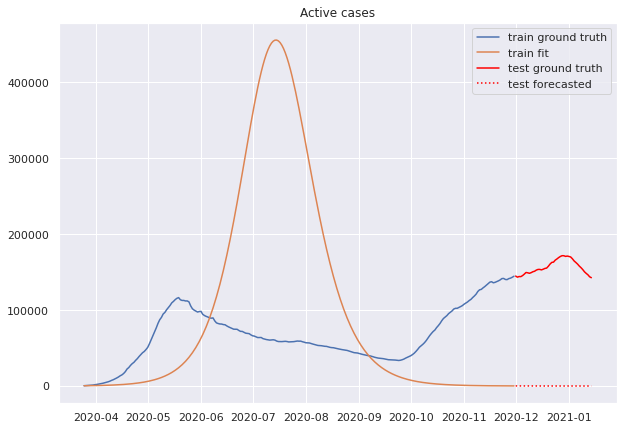

In [59]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['infected'], label='train ground truth')
plt.plot(train_subset.date, I, label='train fit')

plt.plot(test_subset.date, test_subset['infected'], label='test ground truth', color='red')
plt.plot(test_subset.date, test_I, label='test forecasted', color='red', linestyle=':')
plt.legend()
plt.title('Active cases')
plt.show()

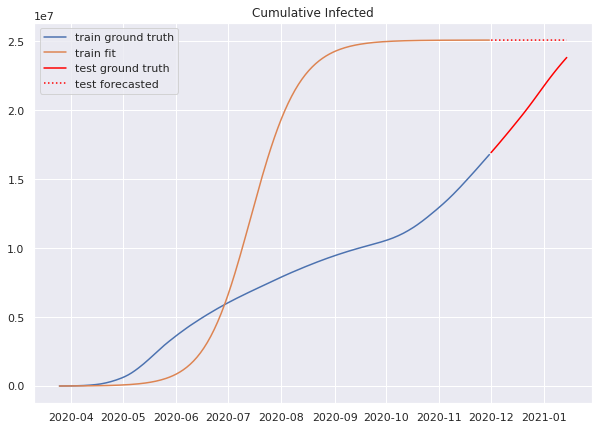

In [60]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['infected'].cumsum(), label='train ground truth')
plt.plot(train_subset.date, I.cumsum(), label='train fit')

plt.plot(test_subset.date, train_subset['infected'].sum()+test_subset['infected'].cumsum(), label='test ground truth', color='red')
plt.plot(test_subset.date, I.sum()+test_I.cumsum(), label='test forecasted', color='red', linestyle=':')
plt.legend()
plt.title('Cumulative Infected')
plt.show()

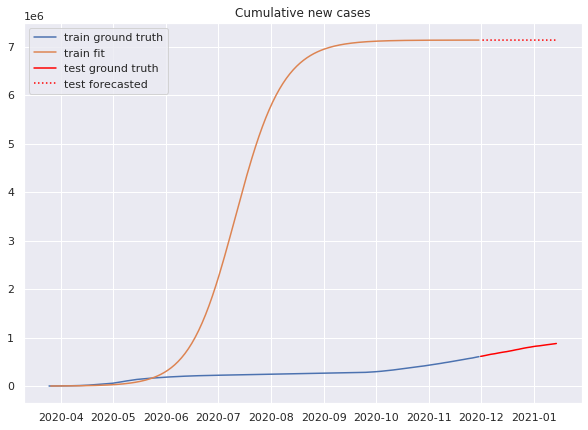

In [61]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['infected_per_day'].cumsum(), label='train ground truth')
plt.plot(train_subset.date, (pd.Series(I).diff() + pd.Series(R).diff() + pd.Series(D).diff()).cumsum(), label='train fit')

plt.plot(test_subset.date, train_subset['infected_per_day'].sum()+test_subset['infected_per_day'].cumsum(), label='test ground truth', color='red')
plt.plot(test_subset.date,  (pd.Series(I).diff() + pd.Series(R).diff() + pd.Series(D).diff()).sum()+(pd.Series(test_I).diff() + pd.Series(test_R).diff() + pd.Series(test_D).diff()).cumsum(), label='test forecasted', color='red', linestyle=':')
plt.legend()
plt.title('Cumulative new cases')
plt.show()

# Future forecast

In [62]:
future_dates = pd.date_range(start=df.iloc[-1].date, periods=365//2)

future_t = np.arange(test_t[-1], test_t[-1]+len(future_dates))

assert len(future_dates) == len(future_t)

In [63]:
test_future_t = np.concatenate([test_t, future_t])

In [64]:
(future_S, future_E, future_I, future_R, future_D), history = model.predict_test(test_future_t)

future_S, future_E, future_I, future_R, future_D = future_S[len(test_t):], future_E[len(test_t):], future_I[len(test_t):], future_R[len(test_t):], future_D[len(test_t):]

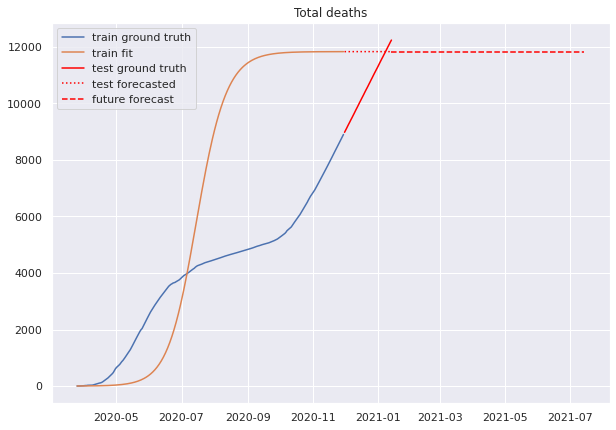

In [65]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['total_dead'], label='train ground truth')
plt.plot(train_subset.date, D, label='train fit')

plt.plot(test_subset.date, test_subset['total_dead'], label='test ground truth', color='red')
plt.plot(test_subset.date, test_D, label='test forecasted', color='red', linestyle=':')

plt.plot(future_dates, future_D, label='future forecast', color='red', linestyle='--')
plt.legend()
plt.title('Total deaths')
plt.show()

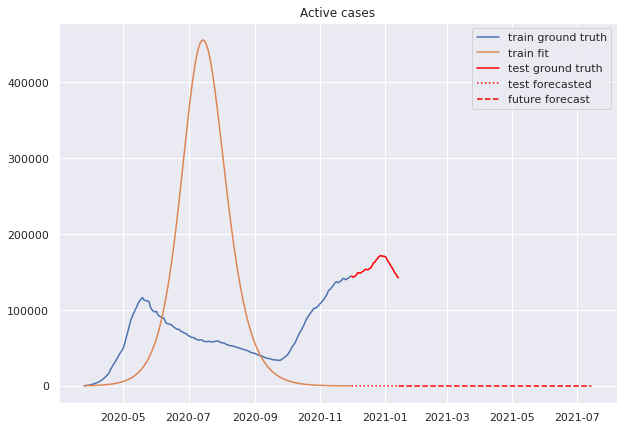

In [66]:
plt.figure(figsize=(10, 7))
plt.plot(train_subset.date, train_subset['infected'], label='train ground truth')
plt.plot(train_subset.date, I, label='train fit')

plt.plot(test_subset.date, test_subset['infected'], label='test ground truth', color='red')
plt.plot(test_subset.date, test_I, label='test forecasted', color='red', linestyle=':')

plt.plot(future_dates, future_I, label='future forecast', color='red', linestyle='--')
plt.legend()
plt.title('Active cases')
plt.show()

# 1-day ahead evaluate

In [67]:
from sklearn.metrics import mean_absolute_error

In [68]:
n_eval_points = 10
eval_period_start = '2020-05-01'
eval_df = df[df.date >= eval_period_start].sample(n_eval_points)
pred_dates = []

true_D, true_R = [], []

baseline_pred_D, baseline_pred_R = [], []
model_pred_D, model_pred_R = [], []

for row in tqdm(eval_df.itertuples(), total=len(eval_df)):
    true_D.append(row.total_dead)
    true_R.append(row.total_recovered)
    
    train_df = df.iloc[:row.Index]
    
    pred_dates.append(row.date)
    prev_day = train_df.iloc[-1]
    pred_D = prev_day.total_dead
    pred_R = prev_day.total_recovered
    baseline_pred_D.append(pred_D)
    baseline_pred_R.append(pred_R)
    
    model = SEIR(verbose=False)
    model.fit(train_df)

    (S, E, I, R, D), history = model.predict_test([len(train_df)])
    model_pred_D.append(D[0])
    model_pred_R.append(R[0])



Mae: 179.16168776300182
Mae: 179.16168776300182
Mae: 179.16168776300182
Mae: 179.16140528151715
Mae: 179.16158370076798
Mae: 179.1616515007544
Mae: 179.1616815352681
Mae: 173.348083602553
Mae: 173.34808071465235
Mae: 173.34806844174392
Mae: 173.3480811410747
Mae: 173.34808055450316
Mae: 171.37777890335394
Mae: 171.37777988016458
Mae: 171.37829833900315
Mae: 171.37776570848837
Mae: 171.37777493793232
Mae: 179.68572702594102
Mae: 175.70469365761474
Mae: 178.61133130074
Mae: 170.33311226656255
Mae: 170.33275020333932
Mae: 170.33310610888753
Mae: 170.33274782714406
Mae: 170.33279442194538
Mae: 170.28802449891776
Mae: 170.2879839955399
Mae: 170.2879938970881
Mae: 170.2879678192191
Mae: 170.2880205197598
Mae: 170.27275406121464
Mae: 170.27274884165317
Mae: 170.27261498848475
Mae: 170.27256308946247
Mae: 170.27275009133032
Mae: 170.26449457621183
Mae: 170.26432241479475
Mae: 170.2642974786118
Mae: 170.26452567174283
Mae: 170.26449059700457
Mae: 170.2631821658028
Mae: 170.26336895897916
Mae: 1

KeyboardInterrupt: 

In [75]:
baseline_D_mae = mean_absolute_error(true_D, baseline_pred_D)
baseline_R_mae = mean_absolute_error(true_R, baseline_pred_R)

model_D_mae = mean_absolute_error(true_D, model_pred_D)
model_R_mae = mean_absolute_error(true_R, model_pred_R)

print('Baseline D mae', round(baseline_D_mae, 3))
print('Model D mae', round(model_D_mae, 3))

print('Baseline R mae', round(baseline_R_mae, 3))
print('Model R mae', round(model_R_mae, 3))

ValueError: Found input variables with inconsistent numbers of samples: [5, 4]